In [ ]:
print("Loading libraries...")

# MATPLOTLIB PYPLOT
import matplotlib.pyplot as plt


# NUMPY
import numpy as np


# PANDAS
import pandas as pd


# JOBLIB / PICKLE
from pickle import dump, load


# SKLEARN

# Standardization Scaling 
from sklearn.preprocessing import StandardScaler


# Dataset Splitting, Model Cross-Validation, and Hyperparameter Tuning
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, StratifiedKFold, RandomizedSearchCV


# Model Performance Evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.inspection import permutation_importance
from sklearn.base import clone

# Sequential Application of Transformers List for Data Preprocessing
# (optional: use a final predictor for sequence conclusion, for predictive modeling)
from sklearn.pipeline import Pipeline

#oversampling model
from imblearn.over_sampling import SMOTE

# Machine Learning Models
from sklearn.linear_model          import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors             import KNeighborsClassifier
from sklearn.tree                  import DecisionTreeClassifier
from sklearn.naive_bayes           import GaussianNB
from sklearn.svm                   import SVC


# Combination of Base Estimators Predictions
# (built with learning algorithms for improving generalizability/robustness over a single estimator)
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier


# Oversampling Datasets
from imblearn.over_sampling import SMOTE

# Permutation Importance
from sklearn.inspection import permutation_importance

# IPYTHON
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# column rule so that you could see all
pd.set_option('display.max_columns', None)

from sklearn.model_selection import HalvingRandomSearchCV

import json

print("Libraries loaded successfully")

Loading libraries...


Libraries loaded successfully


### **data modification**

In [2]:
#Upload Data Set
path = "D:/data/irrigaciones"
file = "/nss chg data 4W under"
extension = ".csv"
df=pd.read_csv(path + file + extension)

In [3]:
df[df.isna().any(axis=1)]

,AGE,SEX,BMI,DOS_MIN,LOS,SSI_4W,EBL_mL,DURAL_TEAR,POSTOP_CSF_LEAK,INTRAOPERATIVE,BA,CANCER,COPD,DM,DM SLEEP APNEA,HBP,HTN,HYPOTHYROIDSM,PROSTATE CANCER,SLEEP APNEA,SMOKER


In [4]:
#Observe Data
df.head()

,AGE,SEX,BMI,DOS_MIN,LOS,SSI_4W,EBL_mL,DURAL_TEAR,POSTOP_CSF_LEAK,INTRAOPERATIVE,BA,CANCER,COPD,DM,DM SLEEP APNEA,HBP,HTN,HYPOTHYROIDSM,PROSTATE CANCER,SLEEP APNEA,SMOKER
0,69,0,27,180,3,0,250,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,73,1,34,180,4,0,150,0,0,1,0,0,0,0,1,0,1,0,0,0,0
2,82,0,45,240,5,0,240,0,0,1,0,0,0,1,0,0,1,1,0,1,0
3,54,1,44,180,6,0,300,0,0,1,0,0,0,1,0,0,1,0,0,0,0
4,56,0,29,200,4,0,150,0,0,0,0,0,0,1,0,0,1,0,0,1,0


In [5]:
# choose the target column

target_column = "SSI_4W"

In [6]:
#Quantify how many responses are per column in order to determine if some of them are better to be removed
cols = []
for col in df.columns:
    a = 0
    b = 0
    
    keys = df[col].value_counts().keys()
    # keys = keys.sort_values()
    print(col)
    
    for key in keys:
        print("%d: %d"%(key, df[col].value_counts()[key]))
        if key == 0:
            a = df[col].value_counts()[key]
        else:
            b = df[col].value_counts()[key]
    print()

    if len(keys) == 2:
        math = max(a,b)/(a+b)*100

        if math >= 95 and a > b:
            cols.append(col)
    if len(keys) == 1:
        cols.append(col)
print(cols)

AGE
63: 9
69: 8
73: 7
56: 6
68: 6
72: 6
57: 6
65: 5
77: 4
49: 4
82: 4
75: 4
45: 4
67: 4
54: 3
58: 3
80: 3
71: 3
38: 2
66: 2
61: 2
52: 2
47: 2
64: 2
70: 2
41: 2
78: 1
81: 1
51: 1
60: 1
50: 1
76: 1
32: 1
79: 1
44: 1
42: 1
37: 1
59: 1
39: 1
46: 1

SEX
0: 60
1: 59

BMI
33: 15
31: 14
29: 10
27: 9
38: 8
35: 7
36: 7
28: 6
34: 6
32: 5
25: 4
37: 3
45: 3
22: 3
26: 3
24: 3
43: 3
39: 2
41: 2
30: 2
23: 2
44: 1
21: 1

DOS_MIN
180: 63
240: 31
120: 13
160: 8
200: 4

LOS
5: 32
3: 29
4: 20
2: 20
7: 12
6: 6

SSI_4W
0: 100
1: 19

EBL_mL
150: 70
250: 31
200: 8
300: 4
100: 3
240: 2
125: 1

DURAL_TEAR
0: 117
1: 2

POSTOP_CSF_LEAK
0: 118
1: 1

INTRAOPERATIVE
1: 74
0: 45

BA
0: 117
1: 2

CANCER
0: 118
1: 1

COPD
0: 114
1: 5

DM
1: 60
0: 59

DM SLEEP APNEA
0: 117
1: 2

HBP
0: 118
1: 1

HTN
1: 82
0: 37

HYPOTHYROIDSM
0: 113
1: 6

PROSTATE CANCER
0: 119

SLEEP APNEA
0: 104
1: 15

SMOKER
0: 119

['DURAL_TEAR', 'POSTOP_CSF_LEAK', 'BA', 'CANCER', 'COPD', 'DM SLEEP APNEA', 'HBP', 'PROSTATE CANCER', 'SMOKER']


In [7]:
#Remove those columns with more than 95% of 0
df.drop(columns=cols, 
        axis="columns", 
        inplace=True)

print("Columns successfully dropped")
print("\n-Remaining columns:")
for num,col in enumerate(df.columns):
    print("%d. %s"%(num+1, col))

Columns successfully dropped

-Remaining columns:
1. AGE
2. SEX
3. BMI
4. DOS_MIN
5. LOS
6. SSI_4W
7. EBL_mL
8. INTRAOPERATIVE
9. DM
10. HTN
11. HYPOTHYROIDSM
12. SLEEP APNEA


In [8]:
#Quantify modified dataset
for col in df.columns:
    print(df[col].value_counts())

AGE
63    9
69    8
73    7
56    6
68    6
72    6
57    6
65    5
77    4
49    4
82    4
75    4
45    4
67    4
54    3
58    3
80    3
71    3
38    2
66    2
61    2
52    2
47    2
64    2
70    2
41    2
78    1
81    1
51    1
60    1
50    1
76    1
32    1
79    1
44    1
42    1
37    1
59    1
39    1
46    1
Name: count, dtype: int64
SEX
0    60
1    59
Name: count, dtype: int64
BMI
33    15
31    14
29    10
27     9
38     8
35     7
36     7
28     6
34     6
32     5
25     4
37     3
45     3
22     3
26     3
24     3
43     3
39     2
41     2
30     2
23     2
44     1
21     1
Name: count, dtype: int64
DOS_MIN
180    63
240    31
120    13
160     8
200     4
Name: count, dtype: int64
LOS
5    32
3    29
4    20
2    20
7    12
6     6
Name: count, dtype: int64
SSI_4W
0    100
1     19
Name: count, dtype: int64
EBL_mL
150    70
250    31
200     8
300     4
100     3
240     2
125     1
Name: count, dtype: int64
INTRAOPERATIVE
1    74
0    45
Name: count, dtype: 

In [9]:
#Separate value of interest from other values. In this case Warfarin Dosing Classification.
X=df.drop(target_column,axis=1)
Y=df[target_column]

In [10]:
# Oversample the original data
ros = SMOTE(random_state=0)

class_counts = Counter(Y)
print("\nClass distribution before oversampling:\n%s" % str(class_counts))

X_resampled, Y_resampled = ros.fit_resample(X, Y)
from collections import Counter

new_class_counts = Counter(Y_resampled)
print("\nNew class distribution:\n%s" % str(new_class_counts))


Class distribution before oversampling:
Counter({0: 100, 1: 19})

New class distribution:
Counter({0: 100, 1: 100})


In [11]:
#Quantify how many responses are per column in order to determine if some of them are better to be removed
cols = []
for col in X_resampled.columns:
    a = 0
    b = 0
    
    keys = X_resampled[col].value_counts().keys()
    # keys = keys.sort_values()
    print(col)
    
    for key in keys:
        print("%d: %d"%(key, X_resampled[col].value_counts()[key]))
        if key == 0:
            a = X_resampled[col].value_counts()[key]
        else:
            b = X_resampled[col].value_counts()[key]
    print()

    if len(keys) == 2:
        math = max(a,b)/(a+b)*100

        if math >= 95 and a > b:
            cols.append(col)
    if len(keys) == 1:
        cols.append(col)
print(cols)

AGE
63: 12
69: 11
57: 11
49: 10
67: 9
68: 8
72: 7
56: 7
73: 7
48: 7
45: 7
64: 6
60: 6
58: 6
47: 5
54: 5
65: 5
50: 4
41: 4
75: 4
82: 4
59: 4
77: 4
52: 4
71: 3
55: 3
80: 3
66: 3
61: 3
37: 3
46: 3
53: 2
38: 2
39: 2
62: 2
76: 2
44: 2
79: 2
70: 2
78: 1
51: 1
81: 1
32: 1
42: 1
43: 1

SEX
0: 127
1: 73

BMI
27: 21
31: 18
33: 18
29: 17
32: 14
28: 13
34: 12
35: 11
36: 11
38: 9
30: 9
25: 8
26: 7
37: 6
24: 5
45: 3
43: 3
22: 3
23: 3
41: 3
39: 3
44: 1
21: 1
40: 1

DOS_MIN
180: 105
240: 43
120: 13
160: 8
200: 4
189: 2
185: 2
145: 2
222: 2
224: 1
219: 1
162: 1
186: 1
147: 1
179: 1
178: 1
124: 1
161: 1
215: 1
232: 1
170: 1
153: 1
199: 1
198: 1
190: 1
175: 1
172: 1
203: 1

LOS
3: 54
5: 49
4: 43
2: 34
7: 13
6: 7

EBL_mL
150: 136
250: 39
200: 8
300: 4
100: 3
240: 2
125: 1
229: 1
236: 1
230: 1
203: 1
218: 1
180: 1
223: 1

INTRAOPERATIVE
1: 123
0: 77

DM
0: 126
1: 74

HTN
1: 102
0: 98

HYPOTHYROIDSM
0: 192
1: 8

SLEEP APNEA
0: 183
1: 17

['HYPOTHYROIDSM']


In [12]:
#Remove those columns with more than 95% of 0
X_resampled.drop(columns=cols, 
        axis="columns", 
        inplace=True)

print("Columns successfully dropped")
print("\n-Remaining columns:")
for num,col in enumerate(X_resampled.columns):
    print("%d. %s"%(num+1, col))

Columns successfully dropped

-Remaining columns:
1. AGE
2. SEX
3. BMI
4. DOS_MIN
5. LOS
6. EBL_mL
7. INTRAOPERATIVE
8. DM
9. HTN
10. SLEEP APNEA


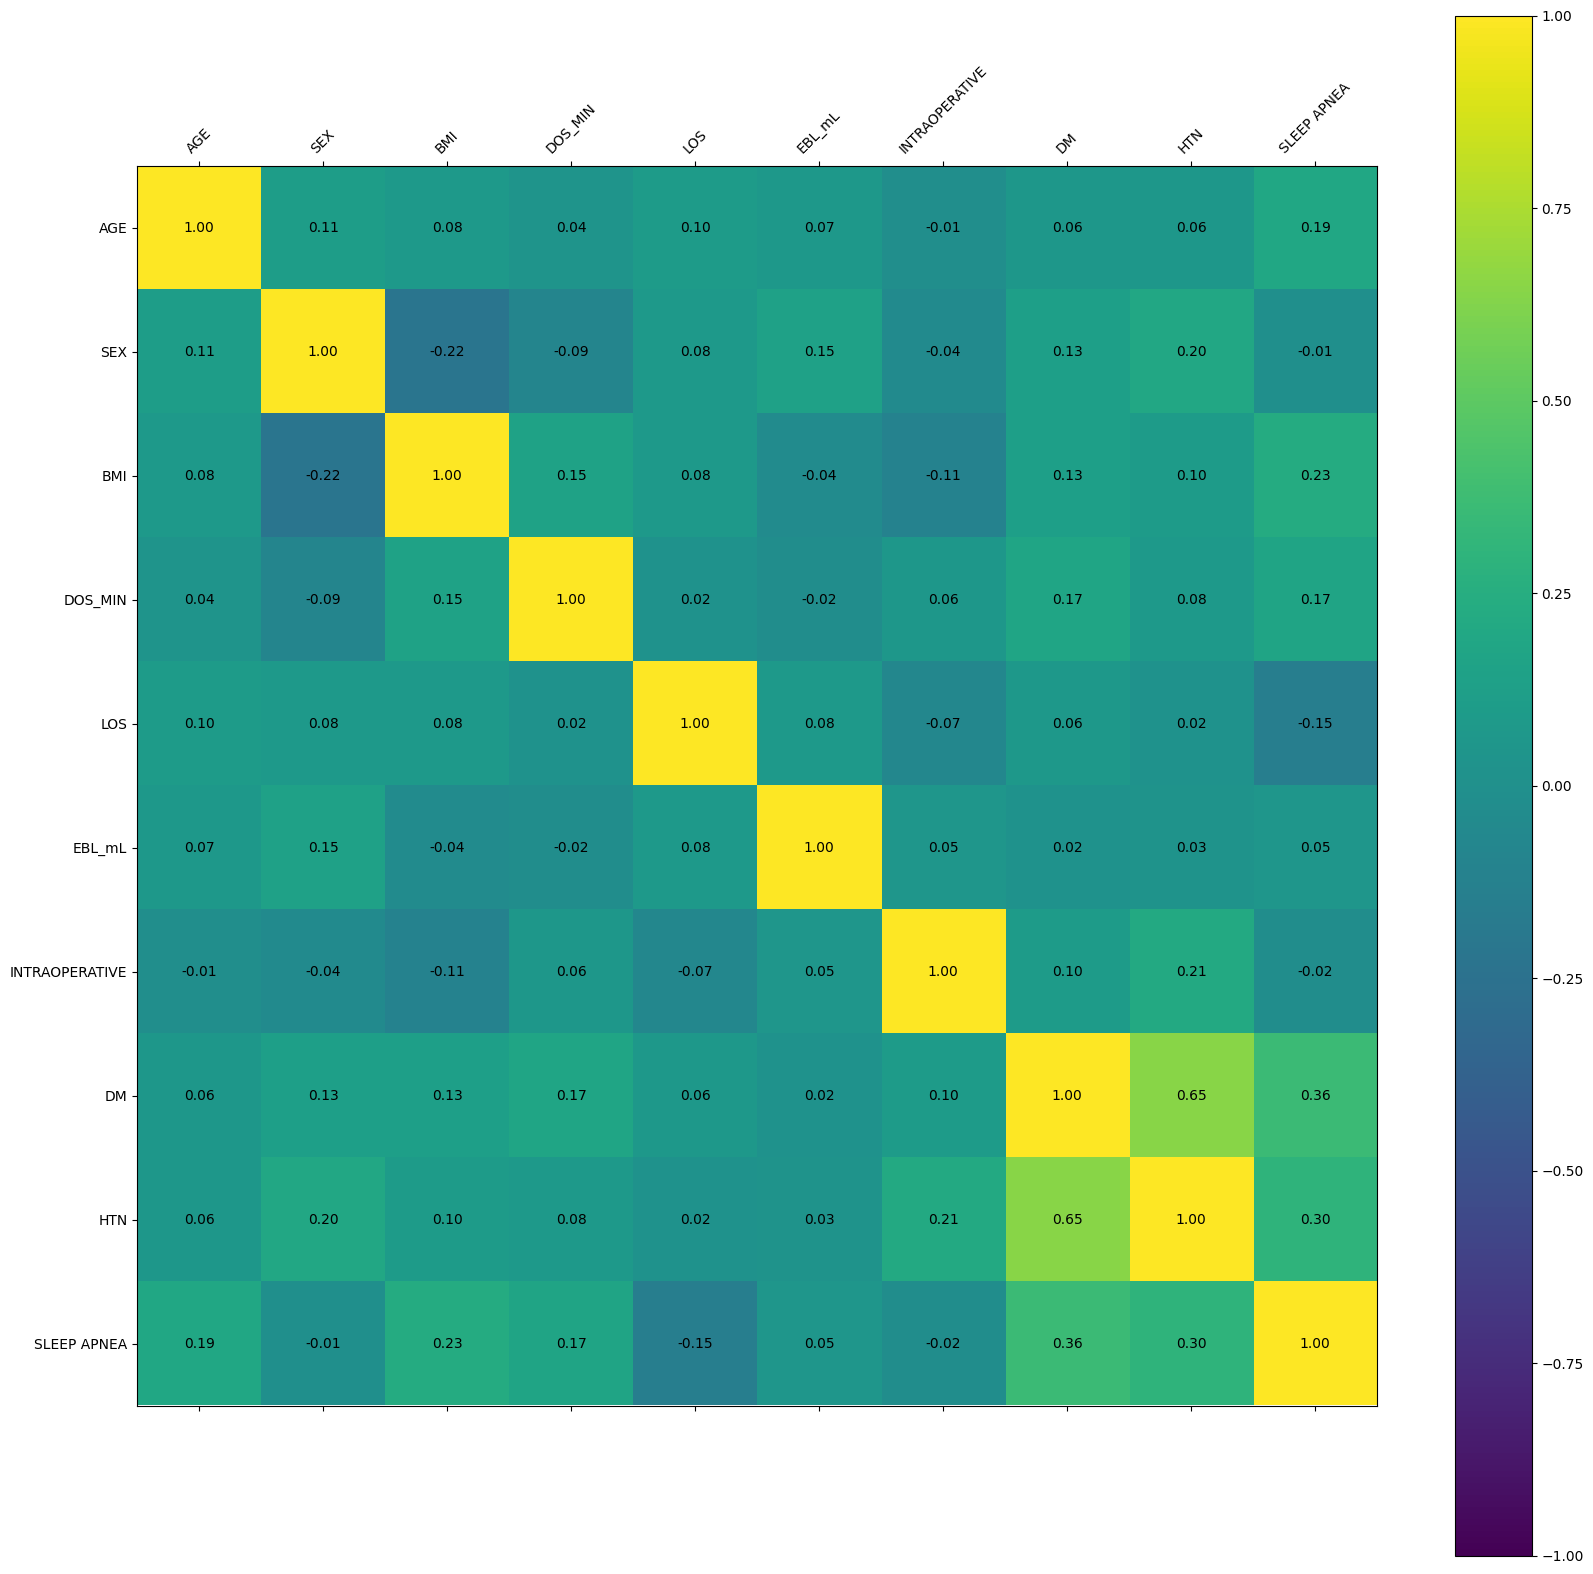

In [13]:
plt.rcParams["figure.figsize"] = (20,20)

#Correlation matrix corrected

column=X_resampled.columns
correlation_matrix = X_resampled.corr('pearson')


# Corr values masking (for keeping inferior triangle) 
# mask_indices = np.triu_indices_from(corr_matrix, k=1)
# corr_matrix.values[mask_indices] = np.nan 


fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlation_matrix, vmin=-1, vmax=1, interpolation='none')
ax.set_xticks(np.arange(len(column)))
ax.set_yticks(np.arange(len(column)))
ax.set_xticklabels(column,fontsize=10, rotation = 45)
ax.set_yticklabels(column, fontsize=10)

# Text of cells
for (i,j), val in np.ndenumerate(correlation_matrix):
    # IF mask_indices is used, uncomment the 'if' statement
    # if i > j:
    ax.text(j, i, f'{val:.2f}', ha="center", va="center", color="black")
            
fig.colorbar(cax)
plt.show()

#VERIFICAR CUAN RELACIONADA ESTNA LOS DOS FEATURES CON .73

In [14]:
tdf = X_resampled.join(Y_resampled)

In [15]:
tdf.to_csv(path + file + " over" + extension, index=False)

### **Train-Validation Data Split**

In [16]:
#Separate Dataset into train and test datasets 
#(using the oversampled data)

X_train, X_validation, Y_train, Y_validation = train_test_split(X_resampled,Y_resampled,test_size=0.20, random_state=2)

### **Normal Models**

In [17]:
def create_models():
    m = []
    m.append(("LR",   LogisticRegression(solver='liblinear')))
    m.append(("LDA",  LinearDiscriminantAnalysis()))
    m.append(("KNN",  KNeighborsClassifier()))
    m.append(("NB",   GaussianNB()))
    m.append(("SVM",  SVC(gamma='auto')))
    m.append(("RFC",  RandomForestClassifier()))
    m.append(("CART", DecisionTreeClassifier()))
    m.append(("GDB",  GradientBoostingClassifier()))

    return m

In [18]:
# Spot Check Algorithms
models = create_models()
names, results, means, stdevs = [], [], [], []

# Test options and evaluation metrics
num_folds, seed, scoring = 10, 7, "accuracy"

for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)

    names.append(name)

    results.append(cv_results)

    means.append(round(cv_results.mean(), 5))
    
    stdevs.append(round(cv_results.std(), 4))
    

# Models Performances
df_models = pd.DataFrame(data={"Mean":means, "Std Dev":stdevs}, index=names)
df_models.sort_values(by="Mean", ascending=False, inplace=True)
df_models

,Mean,Std Dev
GDB,0.82500,0.0612
RFC,0.81875,0.0763
NB,0.76250,0.1075
CART,0.76250,0.1335
LR,0.74375,0.1295
KNN,0.73750,0.0919
LDA,0.73125,0.1154
SVM,0.69375,0.1168


### **Scaled Models**

In [19]:
def create_scaled_models():
    p = []
    p.append(("LR Scaled",  Pipeline([("Scaler", StandardScaler()), ("LR"  ,   LogisticRegression(solver='liblinear'))]) ))
    p.append(("LDA Scaled",  Pipeline([("Scaler", StandardScaler()), ("LDA" ,   LinearDiscriminantAnalysis())])           ))
    p.append(("KNN Scaled",  Pipeline([("Scaler", StandardScaler()), ("KNN" ,   KNeighborsClassifier())])                 ))
    p.append(("NB Scaled",  Pipeline([("Scaler", StandardScaler()), ("NB"  ,   GaussianNB())])                           ))
    p.append(("SVM Scaled",  Pipeline([("Scaler", StandardScaler()), ("SVM" ,   SVC(gamma='auto'))])                      ))
    p.append(("RFC Scaled",   Pipeline([("Scaler", StandardScaler()), ("RFC" ,   RandomForestClassifier())])               ))
    p.append(("CART Scaled",  Pipeline([("Scaler", StandardScaler()), ("CART",   DecisionTreeClassifier())])               ))
    p.append(("GDB Scaled",   Pipeline([("Scaler", StandardScaler()), ("GDB" ,   GradientBoostingClassifier())])           ))
    return p

In [21]:
# Standardize the dataset
pipelines = create_scaled_models()
snames, sresults, means, stdevs = [], [], [], []

num_folds, seed, scoring = 10, 7, "accuracy"


for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    
    cv_sresults = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    
    snames.append(name)

    sresults.append(cv_sresults)

    means.append(round(cv_sresults.mean(), 5))
    
    stdevs.append(round(cv_sresults.std(), 4))



pd.set_option('display.width', 100)

df_pipelines = pd.DataFrame(data={"Mean":means, "Std Dev":stdevs}, index=snames)
df_pipelines.sort_values(by="Mean", ascending=False, inplace=True)
df_pipelines

,Mean,Std Dev
SVM Scaled,0.83125,0.0688
GDB Scaled,0.81875,0.0590
RFC Scaled,0.80625,0.0904
CART Scaled,0.77500,0.1053
KNN Scaled,0.76875,0.0970
NB Scaled,0.76250,0.1075
LR Scaled,0.75625,0.1062
LDA Scaled,0.73125,0.1154


### **Visual Data**

#### best models

In [22]:
df_global = pd.concat([df_models, df_pipelines])
df_global.sort_values(by=["Mean", "Std Dev"], ascending=[False, True], inplace=True)
df_global

,Mean,Std Dev
SVM Scaled,0.83125,0.0688
GDB,0.82500,0.0612
GDB Scaled,0.81875,0.0590
RFC,0.81875,0.0763
RFC Scaled,0.80625,0.0904
CART Scaled,0.77500,0.1053
KNN Scaled,0.76875,0.0970
NB,0.76250,0.1075
NB Scaled,0.76250,0.1075
CART,0.76250,0.1335


In [23]:
df_global.to_csv(path + file + " accuracy" + extension, index=True)

#### Boxplot comparissons

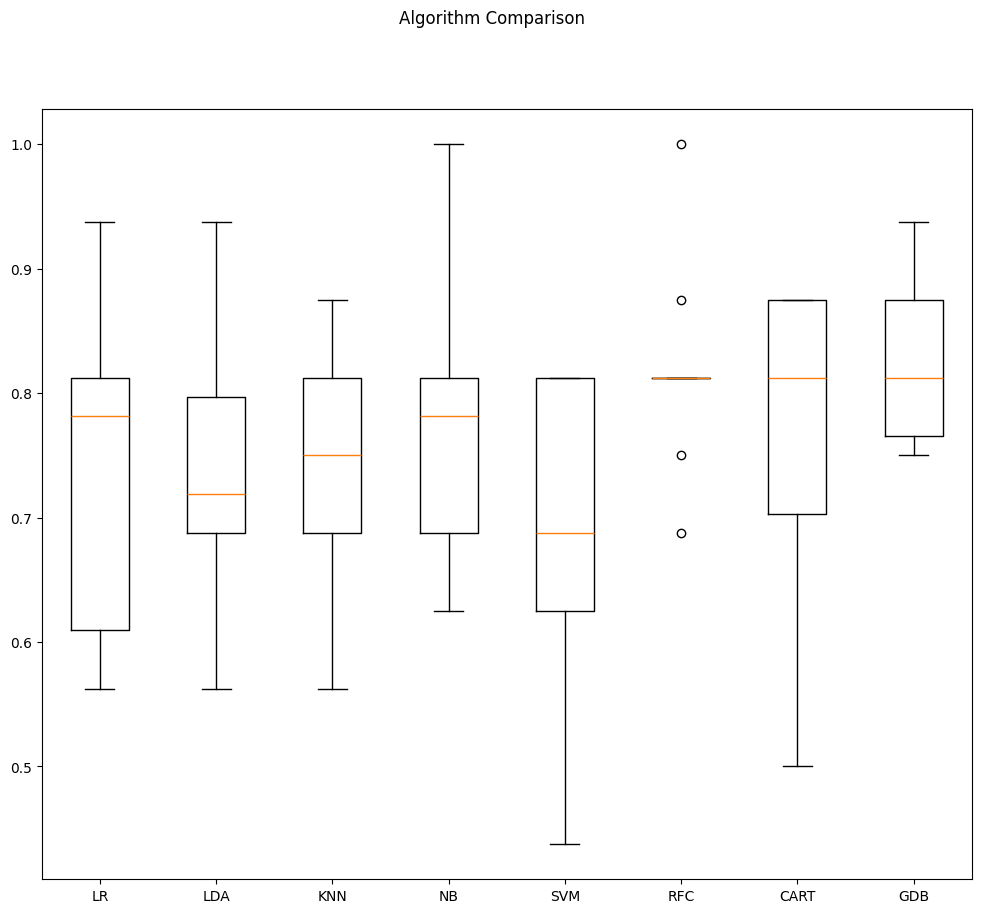

In [24]:
# Compare Algorithms
plt.rcParams["figure.figsize"] = (12, 10)

fig = plt.figure(facecolor="white")
fig.suptitle('Algorithm Comparison') # top title

ax = fig.add_subplot(111)
plt.boxplot(results)

ax.set_xticklabels(names)
# ax.set_yticklabels()
plt.show()


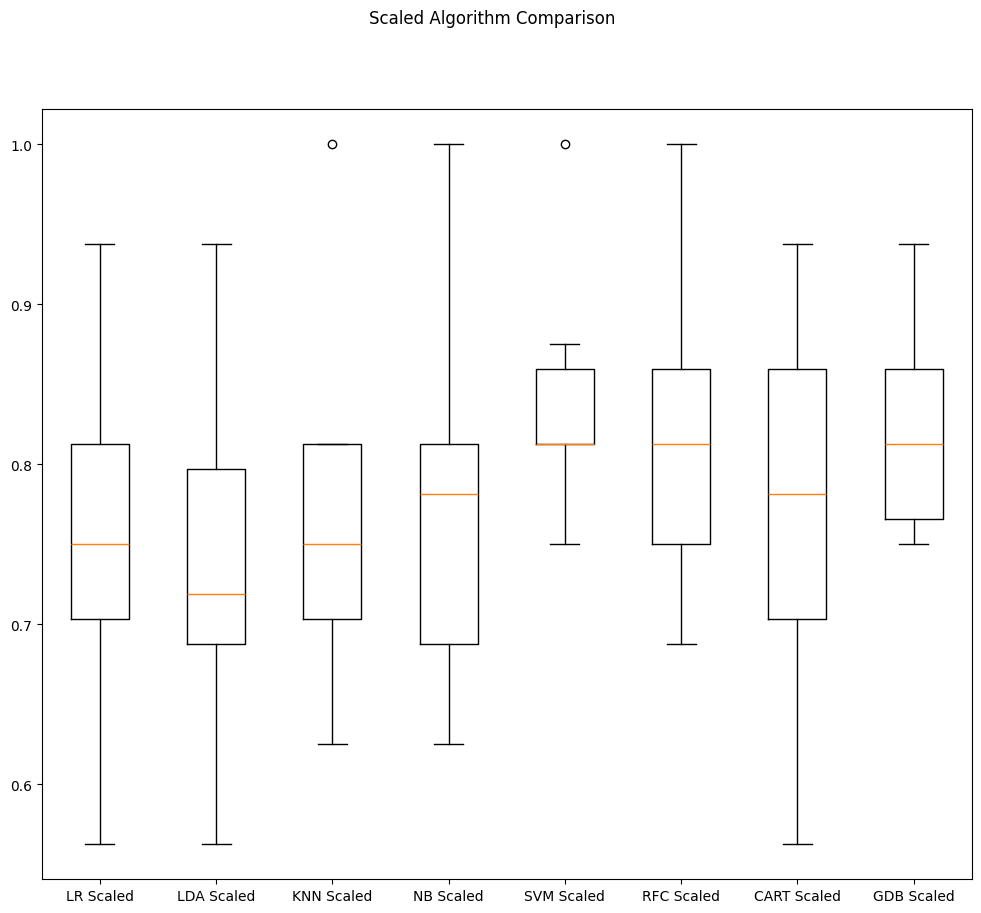

In [25]:
# Compare Algorithms
plt.rcParams["figure.figsize"] = (12, 10)

fig = plt.figure(facecolor="white")
fig.suptitle("Scaled Algorithm Comparison") # top title

ax = fig.add_subplot(111)
plt.boxplot(sresults)

ax.set_xticklabels(snames)
# ax.set_yticklabels()
plt.show()


#### Permutation importances

In [26]:
# Train once on the full training set (for later PI use)
fitted_models = {name: clone(model).fit(X_train, Y_train) for name, model in models}
scaled_fitted_models = {name: clone(model).fit(X_train, Y_train) for name, model in pipelines}

# Choose a scoring appropriate to your problem:
# For classification, use "accuracy", "f1", etc.
# For regression, use "r2", "neg_mean_squared_error", etc.
SCORING = "accuracy"   # change to "r2" if you're doing regression
N_REPEATS = 30
RANDOM_STATE = 0

rows = []
for name, est in fitted_models.items():
    r = permutation_importance(
        est,
        X_validation, Y_validation,
        n_repeats=N_REPEATS,
        random_state=RANDOM_STATE,
        scoring=SCORING,
    )
    order = r.importances_mean.argsort()[::-1]
    for i in order:
        rows.append({
            "Model": name,
            "Feature": X_train.columns[i],
            "Importance_Mean": r.importances_mean[i],
            "Importance_Std": r.importances_std[i],
        })

for name, est in scaled_fitted_models.items():
    r = permutation_importance(
        est,
        X_validation, Y_validation,
        n_repeats=N_REPEATS,
        random_state=RANDOM_STATE,
        scoring=SCORING,
    )
    order = r.importances_mean.argsort()[::-1]
    for i in order:
        rows.append({
            "Model": name,
            "Feature": X_train.columns[i],
            "Importance_Mean": r.importances_mean[i],
            "Importance_Std": r.importances_std[i],
        })

df_importances = pd.DataFrame(rows)
df_importances.head()


,Model,Feature,Importance_Mean,Importance_Std
0,LR,HTN,0.133333,0.068109
1,LR,AGE,0.069167,0.039625
2,LR,INTRAOPERATIVE,0.038333,0.031447
3,LR,SEX,0.030000,0.019791
4,LR,DOS_MIN,0.030000,0.036171


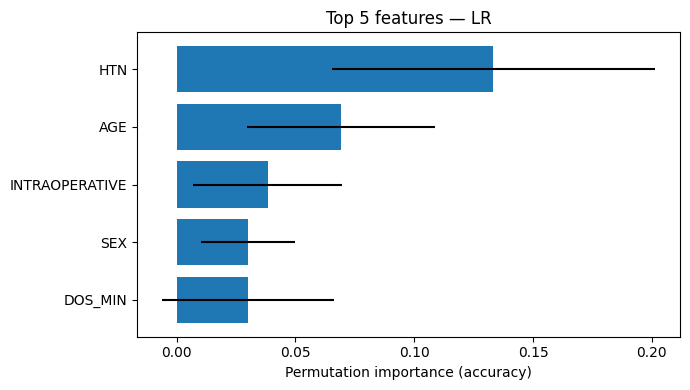

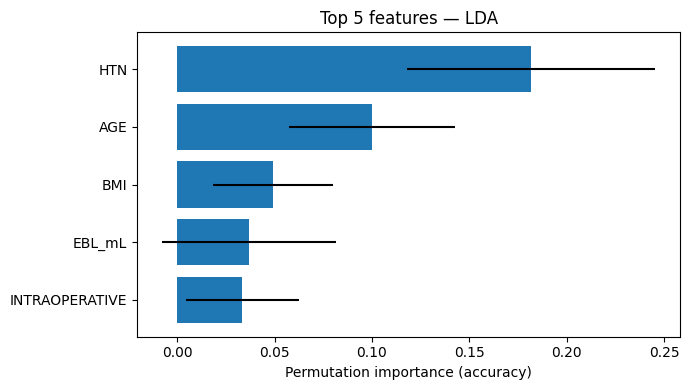

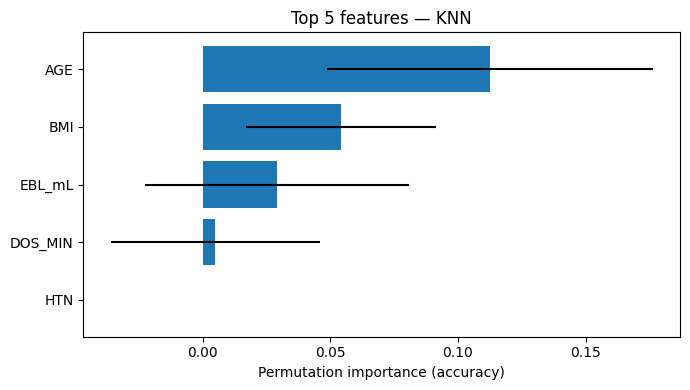

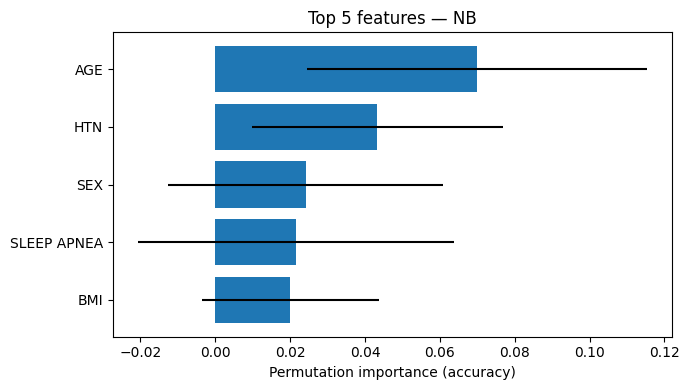

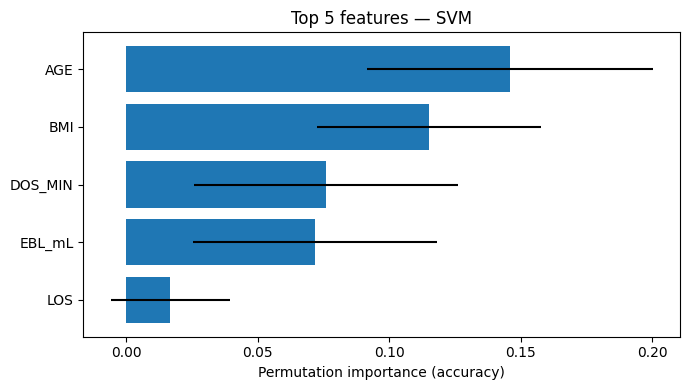

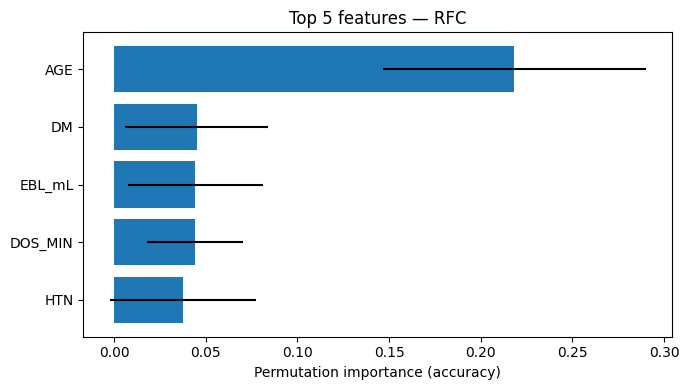

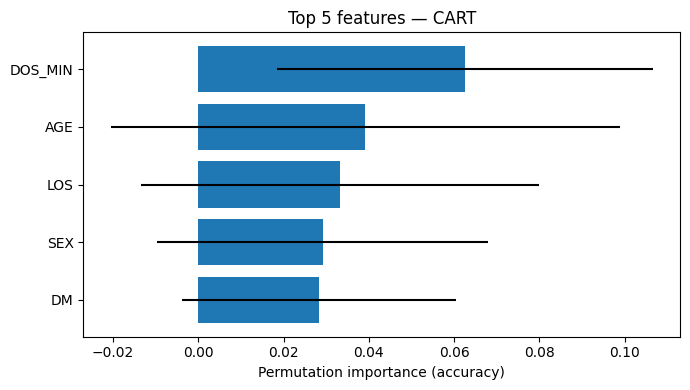

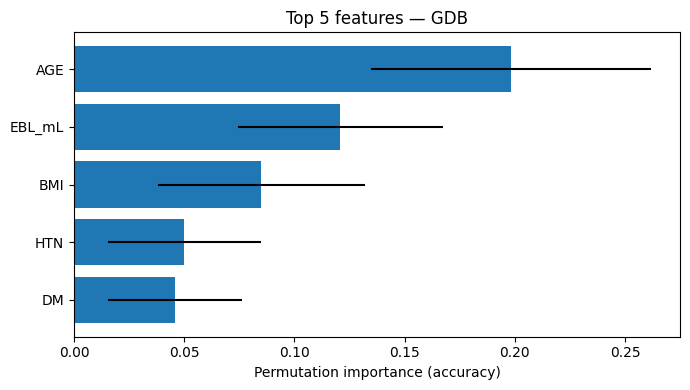

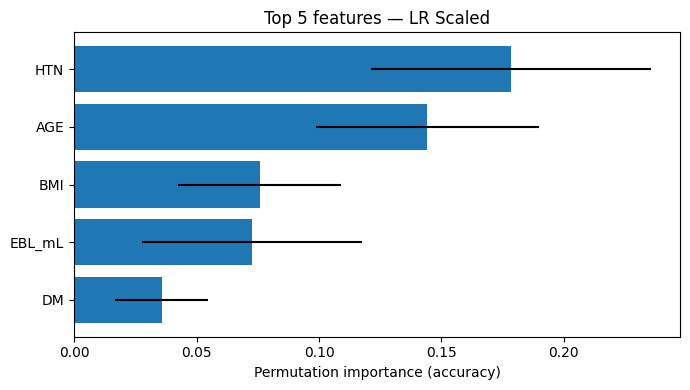

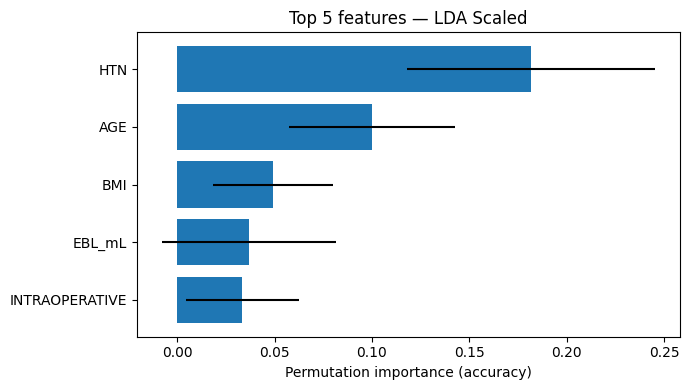

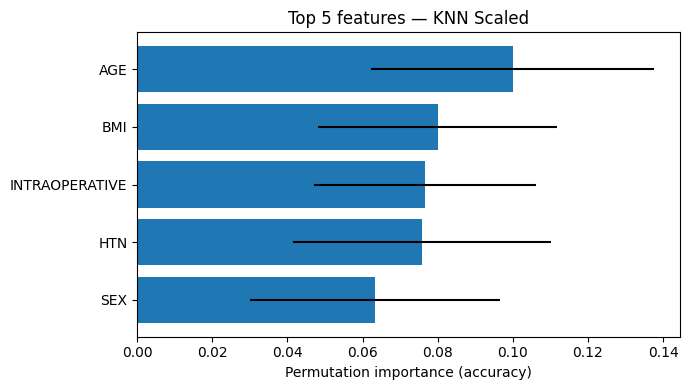

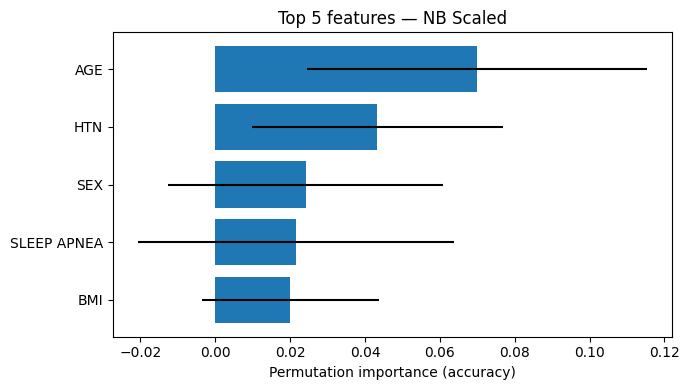

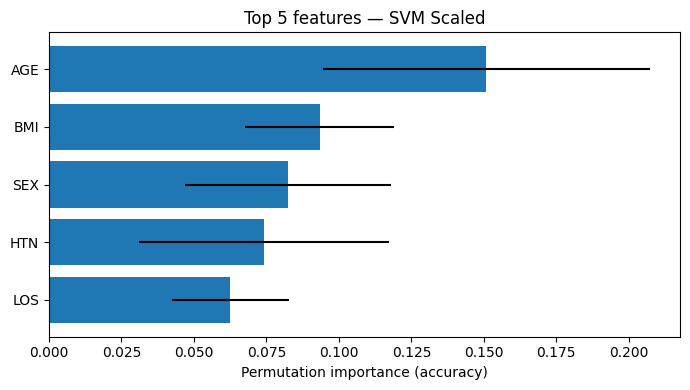

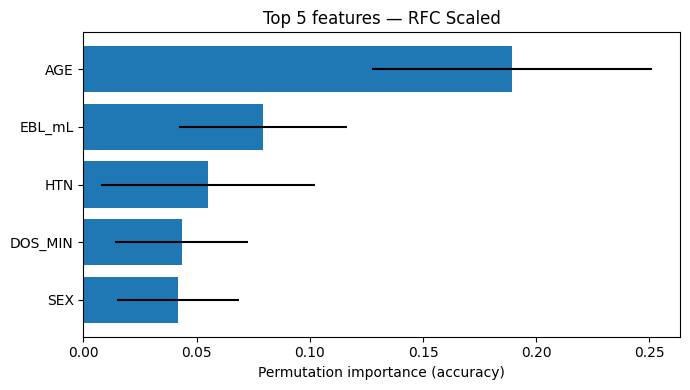

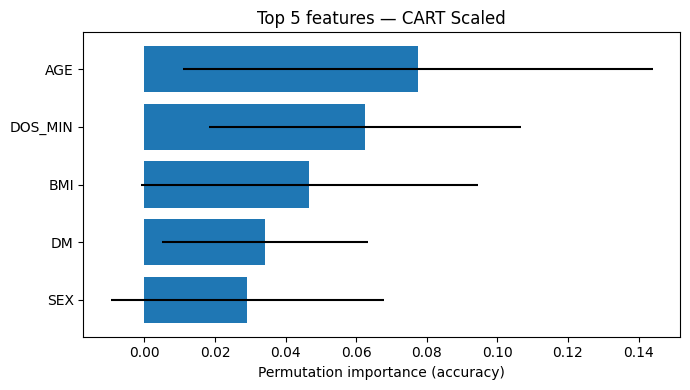

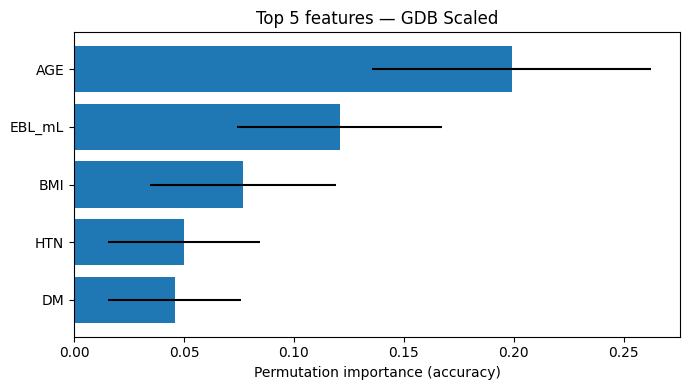

In [27]:
TOP_N = 5

for name, group in df_importances.groupby("Model", sort=False):
    gtop = group.sort_values("Importance_Mean", ascending=False).head(TOP_N).iloc[::-1]
    plt.figure(figsize=(7, max(4, 0.35 * len(gtop))))
    plt.barh(gtop["Feature"], gtop["Importance_Mean"], xerr=gtop["Importance_Std"])
    plt.xlabel(f"Permutation importance ({SCORING})")
    plt.title(f"Top {TOP_N} features — {name}")
    plt.tight_layout()
    plt.show()

### **Model Tuning**
##### Best Performing Models:

In [28]:
import re

def _normalize_name(model_name: str):
    """
    Normalize labels like:
      'SVM  Scaled', 'SVM (scaled)', 'svm scaled' → base='SVM', scaled_flag=True
      'RFC' → base='RFC', scaled_flag=False
    """
    s = re.sub(r"\s+", " ", str(model_name)).strip()
    scaled_flag = re.search(r"\bscaled\b", s, flags=re.I) is not None
    s = re.sub(r"\(.*?\)", "", s, flags=re.I)          # remove any parenthetical like (scaled)
    s = re.sub(r"\bscaled\b", "", s, flags=re.I)       # remove the word 'scaled' (case-insensitive)
    s = re.sub(r"\s+", " ", s).strip()                 # collapse any extra spaces again
    base = s.upper()
    return base, scaled_flag

def get_search_spec(model_name: str, scaled_flag: bool = None):
    """Return estimator + FAST param grid (slimmer than full grid)."""
    base, inferred_scaled = _normalize_name(model_name)
    if scaled_flag is None:
        scaled_flag = inferred_scaled

    if base == "SVM":
        if scaled_flag:
            est = Pipeline([("scaler", StandardScaler()), ("svc", SVC())])
            grid = [
                {   # linear kernel (no gamma)
                    "svc__kernel": ["linear"],
                    "svc__C": np.logspace(-2, 2, 9),
                    "svc__class_weight": [None, "balanced"],
                },
                {   # rbf kernel
                    "svc__kernel": ["rbf"],
                    "svc__C": np.logspace(-2, 2, 9),
                    "svc__gamma": np.logspace(-4, 0, 9),
                    "svc__class_weight": [None, "balanced"],
                },
            ]
        else:
            est = SVC()
            grid = [
                {"kernel": ["linear"], "C": np.logspace(-2, 2, 9), "class_weight": [None, "balanced"]},
                {"kernel": ["rbf"],    "C": np.logspace(-2, 2, 9), "gamma": np.logspace(-4, 0, 9), "class_weight": [None, "balanced"]},
            ]
        return est, grid

    if base == "LR":
        if scaled_flag:
            est = Pipeline([("scaler", StandardScaler()), ("lr", LogisticRegression(solver="liblinear"))])
            grid = {"lr__penalty": ["l1", "l2"], "lr__C": np.logspace(-2, 2, 9), "lr__class_weight": [None, "balanced"]}
        else:
            est = LogisticRegression(solver="liblinear")
            grid = {"penalty": ["l1", "l2"], "C": np.logspace(-2, 2, 9), "class_weight": [None, "balanced"]}
        return est, grid

    if base == "LDA":
        if scaled_flag:
            est = Pipeline([("scaler", StandardScaler()), ("lda", LinearDiscriminantAnalysis())])
            grid = [
                {"lda__solver": ["svd"], "lda__shrinkage": [None]},
                {"lda__solver": ["lsqr", "eigen"], "lda__shrinkage": ["auto", 0.0, 0.1, 0.3, 0.5]},
            ]
        else:
            est = LinearDiscriminantAnalysis()
            grid = [
                {"solver": ["svd"], "shrinkage": [None]},
                {"solver": ["lsqr", "eigen"], "shrinkage": ["auto", 0.0, 0.1, 0.3, 0.5]},
            ]
        return est, grid

    if base == "KNN":
        if scaled_flag:
            est = Pipeline([("scaler", StandardScaler()), ("knn", KNeighborsClassifier())])
            grid = {"knn__n_neighbors": [3, 5, 7, 11], "knn__weights": ["uniform", "distance"], "knn__p": [1, 2]}
        else:
            est = KNeighborsClassifier()
            grid = {"n_neighbors": [3, 5, 7, 11], "weights": ["uniform", "distance"], "p": [1, 2]}
        return est, grid

    if base == "NB":
        est = GaussianNB() if not scaled_flag else Pipeline([("scaler", StandardScaler()), ("nb", GaussianNB())])
        grid = {"var_smoothing": np.logspace(-11, -7, 5)} if not scaled_flag else {"nb__var_smoothing": np.logspace(-11, -7, 5)}
        return est, grid

    if base == "RFC":
        est = RandomForestClassifier()
        grid = {"n_estimators": [100, 200], "max_depth": [None, 10, 20], "max_features": ["sqrt", "log2"]}
        return est, grid

    if base == "CART":
        est = DecisionTreeClassifier()
        grid = {"criterion": ["gini", "entropy"], "max_depth": [None, 10, 20], "min_samples_split": [2, 5, 10]}
        return est, grid

    if base == "GDB":
        est = GradientBoostingClassifier()
        grid = {"n_estimators": [100, 200], "learning_rate": [0.05, 0.1], "max_depth": [2, 3, 4]}
        return est, grid

    raise ValueError(f"Unknown model name: {model_name}")

In [ ]:
# CV for model selection during tuning (classification)
num_folds, seed, scoring = 10, 7, "accuracy"
skf = StratifiedKFold(n_splits=num_folds, random_state=seed, shuffle=True)

def _space_size(param_grid):
    """Count total discrete combinations if all values are discrete lists.
       Returns an int or None (if any value is non-discrete / distribution)."""
    def dict_size(d):
        sz = 1
        for v in d.values():
            if isinstance(v, (list, tuple, np.ndarray)):
                sz *= len(v)
            else:
                return None  # non-discrete (e.g., scipy.stats distribution)
        return sz

    if isinstance(param_grid, list):
        total = 0
        for g in param_grid:
            s = dict_size(g)
            if s is None: 
                return None
            total += s
        return total
    elif isinstance(param_grid, dict):
        return dict_size(param_grid)
    else:
        return None

def tune_models(model_names, scaled_flag=None, X_train=None, Y_train=None,
                subsample_frac=1.0, random_state=7,
                search_type="grid", n_iter=20, factor=3):
    """
    Tune multiple models with selectable search strategy: 'grid' | 'random' | 'halving'.
    - Auto-subsample via subsample_frac for speed.
    - Auto-switch to GridSearch if RandomizedSearch space is small (discrete).
    - Auto-cap n_iter to space size to avoid warnings.
    """
    # optionally subsample
    if subsample_frac < 1.0:
        X_tune, _, y_tune, _ = train_test_split(
            X_train, Y_train, train_size=subsample_frac,
            stratify=Y_train, random_state=random_state
        )
    else:
        X_tune, y_tune = X_train, Y_train

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)
    tuned = {}

    for name in model_names:
        est, param_grid = get_search_spec(name, scaled_flag)

        stype = search_type  # local copy we may override
        if stype == "random":
            size = _space_size(param_grid)
            if size is not None and size <= n_iter:
                # Small discrete space: switch to full grid
                stype = "grid"
            elif size is not None:
                # Cap n_iter to space size to avoid warning
                n_iter = min(n_iter, size)

        if stype == "grid":
            search = GridSearchCV(
                estimator=est, param_grid=param_grid,
                scoring="accuracy", cv=cv, n_jobs=-1, verbose=0, refit=True
            )
        elif stype == "random":
            search = RandomizedSearchCV(
                estimator=est, param_distributions=param_grid,
                n_iter=n_iter, scoring="accuracy", cv=cv,
                n_jobs=-1, random_state=random_state, verbose=0, refit=True
            )
        elif stype == "halving":
            search = HalvingRandomSearchCV(
                estimator=est, param_distributions=param_grid,
                factor=factor, resource="n_samples", max_resources="auto",
                scoring="accuracy", cv=cv, n_jobs=-1, random_state=random_state, verbose=0
            )
        else:
            raise ValueError("search_type must be 'grid', 'random', or 'halving'")

        res = search.fit(X_tune, y_tune)
        tuned[name] = res

    return tuned

In [ ]:
tuned_normal  = tune_models(list(df_models[df_models.index.isin(df_global.head(3).index)].index), scaled_flag=False, X_train=X_train, Y_train=Y_train, search_type="random", n_iter=30)

tuned_scaled  = tune_models(list(df_pipelines[df_pipelines.index.isin(df_global.head(3).index)].index), scaled_flag=False, X_train=X_train, Y_train=Y_train, search_type="random", n_iter=30)

In [31]:
# Collect best estimators and scores
summary_rows = []

for name, gs in tuned_normal.items():
    summary_rows.append({"Set": "Normal", "Model": name, "Best Score": gs.best_score_, "Best Params": gs.best_params_})

for name, gs in tuned_scaled.items():
    summary_rows.append({"Set": "Scaled", "Model": name, "Best Score": gs.best_score_, "Best Params": gs.best_params_})

df_tuned_summary = pd.DataFrame(summary_rows).sort_values(["Best Score"], ascending=False)
df_tuned_summary


,Set,Model,Best Score,Best Params
2,Scaled,GDB Scaled,0.85000,"{'learning_rate': 0.05, 'max_depth': 4, 'n_est..."
0,Normal,GDB,0.84375,"{'learning_rate': 0.05, 'max_depth': 4, 'n_est..."
1,Scaled,SVM Scaled,0.78750,"{'kernel': 'rbf', 'gamma': 0.00316227766016837..."


### **Model Finalization**

In [35]:
def refit_full_from_search(search_obj, X_train, Y_train, bump_trees=True):
    """
    Takes a fitted Grid/Random/HalvingSearchCV object,
    clones its best_estimator_ with best_params_,
    optionally bumps tree n_estimators, and refits on FULL X_train.
    """
    est = search_obj.best_estimator_   # ✅ fixed underscore
    # Optionally bump tree-based models for a stronger final model
    if bump_trees:
        try:
            from sklearn.pipeline import Pipeline
            if isinstance(est, Pipeline):
                final_step_name, final_est = est.steps[-1]
                if final_step_name and hasattr(final_est, "n_estimators"):
                    final_est.set_params(n_estimators=max(300, getattr(final_est, "n_estimators", 100)))
            else:
                if hasattr(est, "n_estimators"):
                    est.set_params(n_estimators=max(300, getattr(est, "n_estimators", 100)))
        except Exception:
            pass  # safe fallback if estimator doesn't support it

    # Refit on all training data
    est.fit(X_train, Y_train)
    return est

def evaluate_model(name, est, X_val, Y_val, print_report=True):
    preds = est.predict(X_val)
    acc = accuracy_score(Y_val, preds)
    cm  = confusion_matrix(Y_val, preds)
    if print_report:
        print(f"\n=== {name} — Final Evaluation on Validation ===")
        print(f"Accuracy: {acc:.5f}\n")
        print("Confusion Matrix:\n", cm, "\n")
        print("Classification Report:\n", classification_report(Y_val, preds))
    return {"Model": name, "Accuracy": acc, "ConfusionMatrix": cm}

In [36]:
# Assumes you ran tune_models(...) and have a dict like tuned_scaled with your top-3
final_scaled = {}
rows_scaled = []

for name, search in tuned_scaled.items():
    best_est_final = refit_full_from_search(search, X_train, Y_train, bump_trees=True)
    final_scaled[name] = best_est_final
    rows_scaled.append(evaluate_model(f"{name} (Scaled Final)", best_est_final, X_validation, Y_validation, print_report=True))

df_final_scaled = pd.DataFrame([{"Model": r["Model"], "Accuracy": r["Accuracy"]} for r in rows_scaled]).sort_values("Accuracy", ascending=False)


=== SVM Scaled (Scaled Final) — Final Evaluation on Validation ===
Accuracy: 0.80000

Confusion Matrix:
 [[19  5]
 [ 3 13]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.79      0.83        24
           1       0.72      0.81      0.76        16

    accuracy                           0.80        40
   macro avg       0.79      0.80      0.80        40
weighted avg       0.81      0.80      0.80        40


=== GDB Scaled (Scaled Final) — Final Evaluation on Validation ===
Accuracy: 0.92500

Confusion Matrix:
 [[21  3]
 [ 0 16]] 

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.88      0.93        24
           1       0.84      1.00      0.91        16

    accuracy                           0.93        40
   macro avg       0.92      0.94      0.92        40
weighted avg       0.94      0.93      0.93        40



In [37]:
final_normal = {}
rows_normal = []

for name, search in tuned_normal.items():
    best_est_final = refit_full_from_search(search, X_train, Y_train, bump_trees=True)
    final_normal[name] = best_est_final
    rows_normal.append(evaluate_model(f"{name} (Normal Final)", best_est_final, X_validation, Y_validation, print_report=True))

df_final_normal = pd.DataFrame([{"Model": r["Model"], "Accuracy": r["Accuracy"]} for r in rows_normal]).sort_values("Accuracy", ascending=False)



=== GDB (Normal Final) — Final Evaluation on Validation ===
Accuracy: 0.92500

Confusion Matrix:
 [[21  3]
 [ 0 16]] 

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.88      0.93        24
           1       0.84      1.00      0.91        16

    accuracy                           0.93        40
   macro avg       0.92      0.94      0.92        40
weighted avg       0.94      0.93      0.93        40



In [38]:
# Build a combined results table from finalists
rows = []

# Scaled finalists
for name, search in tuned_scaled.items():
    est = final_scaled.get(name)
    if est is None:
        continue
    acc = accuracy_score(Y_validation, est.predict(X_validation))
    rows.append({
        "Model": name,
        "Set": "Scaled",
        "Accuracy": acc,
        "BestParams": json.dumps(search.best_params_)  # pretty-serialized dict
    })

# Normal finalists
for name, search in tuned_normal.items():
    est = final_normal.get(name)
    if est is None:
        continue
    acc = accuracy_score(Y_validation, est.predict(X_validation))
    rows.append({
        "Model": name,
        "Set": "Normal",
        "Accuracy": acc,
        "BestParams": json.dumps(search.best_params_)
    })

# Combine, rank, keep top 3
df_final_all = pd.DataFrame(rows).sort_values("Accuracy", ascending=False).reset_index(drop=True)
top3 = df_final_all.head(3).copy()

# Save to a single CSV
csv_path = path + file + " top3m accuracy" + extension
top3.to_csv(csv_path, index=False)

print(f"Saved Top 3 models to {csv_path}")

Saved Top 3 models to D:/data/irrigaciones/nss chg data 4W under top3m accuracy.csv


### **Permutation Importance**

In [43]:
def compute_perm_importance(estimator, X, y, scoring="accuracy", n_repeats=30, random_state=5):
    """
    Runs permutation_importance on (X, y) using an already-fitted estimator or Pipeline.
    Returns a tidy DataFrame with Feature, Importance_Mean, Importance_Std.
    """
    r = permutation_importance(
        estimator,
        X, y,
        n_repeats=n_repeats,
        random_state=random_state,
        scoring=scoring,
        n_jobs=-1
    )
    features = getattr(X, "columns", np.arange(X.shape[1]))
    df = pd.DataFrame({
        "Feature": features,
        "Importance_Mean": r.importances_mean,
        "Importance_Std":  r.importances_std
    }).sort_values("Importance_Mean", ascending=False, ignore_index=True)
    return df

In [ ]:
all_perm_rows = []

for _, row in top3.iterrows():
    model_name = row["Model"]
    set_name   = row.get("Set", "Scaled" if "Scaled" in model_name else "Normal")

    # fetch the fitted estimator
    if set_name.lower().startswith("scaled"):
        est = final_scaled.get(model_name.replace(" (Scaled Final)", "").replace(" (Scaled)", "").strip())
        # fallback if keys are just the base name
        if est is None:
            est = final_scaled.get(model_name)
    else:
        est = final_normal.get(model_name.replace(" (Normal Final)", "").replace(" (Normal)", "").strip())
        if est is None:
            est = final_normal.get(model_name)

    if est is None:
        print(f"[warn] Skipping {model_name} — not found in finalists dicts.")
        continue

    # Compute permutation importance on validation (pipeline handles scaling if present)
    perm_df = compute_perm_importance(est, X_validation, Y_validation, scoring="accuracy", n_repeats=30, random_state=5)
    perm_df.insert(0, "Model", model_name)
    perm_df.insert(1, "Set", set_name)

    all_perm_rows.append(perm_df)

# Combine all PI results for the top 3 and save a single CSV
perm_all_top3 = pd.concat(all_perm_rows, ignore_index=True)
perm_csv_path = path + file + " top3m imortance" + extension
perm_all_top3.to_csv(perm_csv_path, index=False)

print(f"Saved permutation importance for top 3 to {perm_csv_path}")

Saved permutation importance for top 3 to D:/data/irrigaciones/nss chg data 4W under top3m imortance.csv
